In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt_statsgraphstsa
import statsmodels.tsa.stattools as sts_statstsatool
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
from math import sqrt

import seaborn as sns
sns.set()

**Importing Data and Pre-processing**

In [2]:
raw_csv_data = pd.read_csv('../01-Intro/IndexE8.csv')
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index('date', inplace = True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method = 'ffill')

In [3]:
df_comp['market_value'] = df_comp.ftse

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']

size = int(len(df_comp) * 0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

**LLR Test**

In [5]:
def LLR_Test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2 * (L2-L1))
    p = chi2.sf(LR, DF). round(5)

    return p

**Creating Returns**

In [6]:
df['returns'] = df.market_value.pct_change(1) * 100

C:\Users\Yago\AppData\Local\Temp\ipykernel_13700\927300507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df.market_value.pct_change(1) * 100


**ACF for Returns**

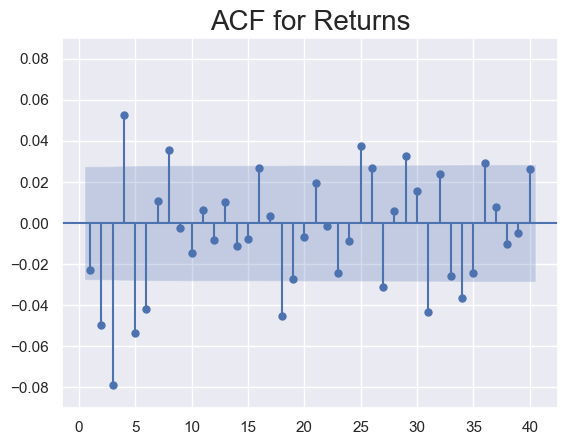

In [9]:
sgt_statsgraphstsa.plot_acf(df.returns[1:], zero = False, lags = 40)
plt.title('ACF for Returns', size = 20)
plt.ylim([-0.09, 0.09])
plt.show()

**MA for Returns**

In [18]:
#Model Return MA(1) -> Order(P, D, Q)
# P -> AutoRegressive Models
# D -> Differences
# Q -> Moving Average Models
mod_ret_ma_1 = ARIMA(df.returns[1:], order = (0, 0, 1))
res_ret_ma_1 = mod_ret_ma_1.fit()
res_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -7929.595
Date:                Tue, 13 Dec 2022   AIC                          15865.190
Time:                        12:26:43   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.146      0.252      -0.013       0.051
ma.L1         -0.0257      0.009     -3.018      0.003      -0.042      -0.009
sigma2         1.3789      0.014     99.990      0.000       1.352       1.406
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7852.85
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
mod_ret_ma_2 = ARIMA(df.returns[1:], order = (0, 0, 2))
res_ret_ma_2 = mod_ret_ma_2.fit()
print(res_ret_ma_2.summary())
print("\nLLR Test p-value = " + str(LLR_Test(mod_ret_ma_1, mod_ret_ma_2)))


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -7922.864
Date:                Tue, 13 Dec 2022   AIC                          15853.728
Time:                        12:43:53   BIC                          15879.812
Sample:                    01-10-1994   HQIC                         15862.868
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.204      0.228      -0.012       0.049
ma.L1         -0.0327      0.009     -3.760      0.000      -0.050      -0.016
ma.L2         -0.0502      0.008     -6.416      0.0

In [22]:
mod_ret_ma_3 = ARIMA(df.returns[1:], order = (0, 0, 3))
res_ret_ma_3 = mod_ret_ma_3.fit()
print(res_ret_ma_3.summary())
print("\nLLR Test p-value = " + str(LLR_Test(mod_ret_ma_2, mod_ret_ma_3)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -7904.317
Date:                Tue, 13 Dec 2022   AIC                          15818.634
Time:                        12:44:22   BIC                          15851.240
Sample:                    01-10-1994   HQIC                         15830.060
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.296      0.195      -0.010       0.048
ma.L1         -0.0203      0.009     -2.334      0.020      -0.037      -0.003
ma.L2         -0.0556      0.008     -7.032      0.0